<a href="https://colab.research.google.com/github/SamuelDuong/JackBlog.github.io/blob/master/RFMAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM Analysis using Python

RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.

## RFM Analysis: Overview

Using RFM Analysis, a business can assess customers’:


* Recency (the date they made their last purchase)
* Frequency (how often they make purchases)
* Monetary value of a customer are three key metrics that provide information about customer engagement, loyalty, and value to a business.

## RFM Analysis using Python


In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("rfm_data.csv")
print(data.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


### Calculating RFM Values
We'll now calculate the Recency, Frequency, and Monetary values of the customers to move further:

In [6]:
import pandas as pd
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

# Read CSV file with parse_dates argument
data = pd.read_csv("rfm_data.csv", parse_dates=["PurchaseDate"])
print(data.head())
# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')
# Calculate Recency
data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).dt.days
# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  
0     Tokyo  
1    London  
2  New York  
3    London  
4     Paris  


To calculate recency, we subtracted the purchase date from the current date and extracted the number of days using the datetime.now().date() function. It gives us the number of days since the customer’s last purchase, representing their recency value.

After that, we calculated the frequency for each customer. We grouped the data by ‘CustomerID’ and counted the number of unique ‘OrderID’ values to determine the number of purchases made by each customer. It gives us the frequency value, representing the total number of purchases made by each customer.

Finally, we calculated the monetary value for each customer. We grouped the data by ‘CustomerID’ and summed the ‘TransactionAmount’ values to calculate the total amount spent by each customer. It gives us the monetary value, representing the total monetary contribution of each customer.

By performing these calculations, we now have the necessary RFM values (recency, frequency, monetary value) for each customer, which are important indicators for understanding customer behaviour and segmentation in RFM analysis.

In [7]:
print(data.head())

   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  Frequency  MonetaryValue  
0     Tokyo          1         943.31  
1    London          1         463.70  
2  New York          1          80.28  
3    London          1         221.29  
4     Paris          1         739.56  


## **Calculating RFM Scores**
Now let’s calculate the recency, frequency, and monetary scores:

In [ ]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase. It means that customers who have purchased more recently will receive higher recency scores.

We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. Customers who made more frequent purchases will receive higher frequency scores.

To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

To calculate RFM scores, we used the pd.cut() function to divide recency, frequency, and monetary values into bins. We define 5 bins for each value and assign the corresponding scores to each bin.

Once the scores are added to the data, you will notice that they are categorical variables. You can use the data.info() method to confirm this. So we need to convert their datatype into integers to use these scores further:

In [ ]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

### RFM Value Segmentation
Now let’s calculate the final RFM score and the value segment according to the scores:

In [ ]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

To calculate the RFM score, we add the scores obtained for recency, frequency and monetary value. For example, if a customer has a recency score of 3, a frequency score of 4, and a monetary score of 5, their RFM score will be 12.

After calculating the RFM scores, we created RFM segments based on the scores. We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”. Segmentation is done using the pd.qcut() function, which evenly distributes scores between segments.

Now let’s have a look at the resulting data:

In [ ]:
print(data.head())



```
   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0        8814   2023-04-11             943.31          Product C   890075   
1        2188   2023-04-11             463.70          Product A   176819   
2        4608   2023-04-11              80.28          Product A   340062   
3        2559   2023-04-11             221.29          Product A   239145   
4        9482   2023-04-11             739.56          Product A   194545   

   Location  Recency  Frequency  MonetaryValue  RecencyScore  FrequencyScore  \
0     Tokyo       62          1         943.31             1               1   
1    London       62          1         463.70             1               1   
2  New York       62          1          80.28             1               1   
3    London       62          1         221.29             1               1   
4     Paris       62          1         739.56             1               1   

   MonetaryScore  RFM_Score Value Segment  
0              2          4     Low-Value  
1              1          3     Low-Value  
2              1          3     Low-Value  
3              1          3     Low-Value  
4              2          4     Low-Value  
```



Now let’s have a look at the segment distribution:

In [ ]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count',
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

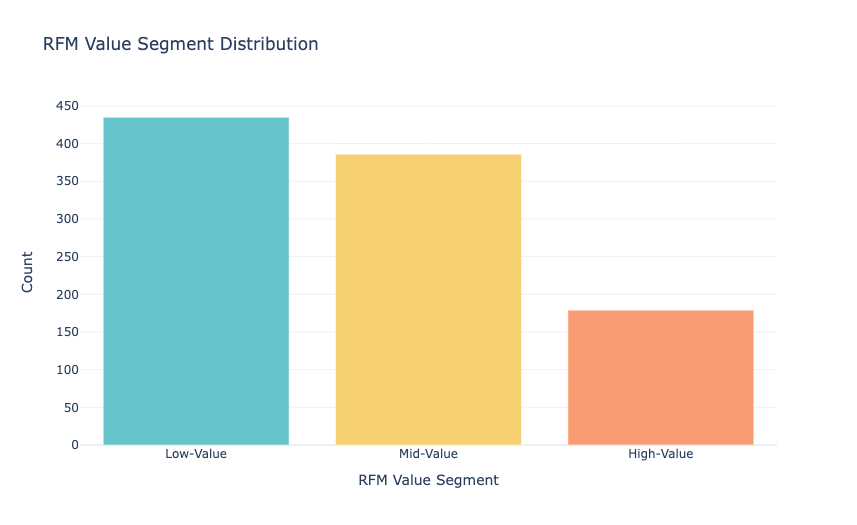

### RFM Customer Segments
The above segments that we calculated are RFM value segments. Now we’ll calculate RFM customer segments. The RFM value segment represents the categorization of customers based on their RFM scores into groups such as “low value”, “medium value”, and “high value”. These segments are determined by dividing RFM scores into distinct ranges or groups, allowing for a more granular analysis of overall customer RFM characteristics. The RFM value segment helps us understand the relative value of customers in terms of recency, frequency, and monetary aspects.

Now let’s create and analyze RFM Customer Segments that are broader classifications based on the RFM scores. These segments, such as “Champions”, “Potential Loyalists”, and “Can’t Lose” provide a more strategic perspective on customer behaviour and characteristics in terms of recency, frequency, and monetary aspects.

In [ ]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

## RFM Analysis
Now let’s analyze the distribution of customers across different RFM customer segments within each value segment:

In [ ]:
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segments'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

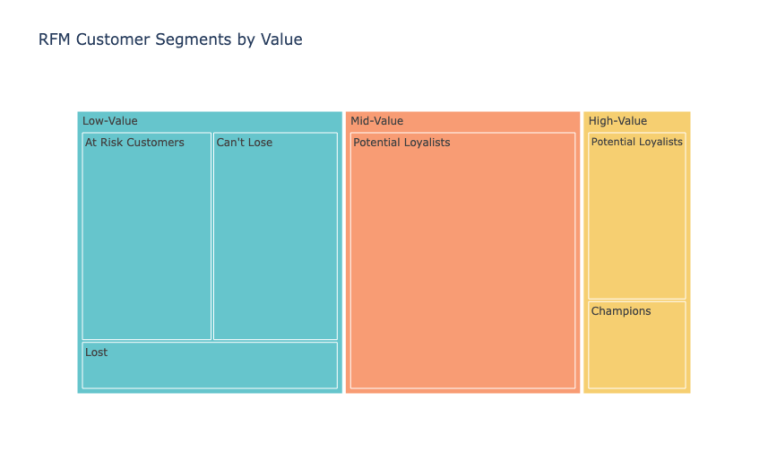

 let’s analyze the distribution of RFM values within the Champions segment:

In [ ]:
# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

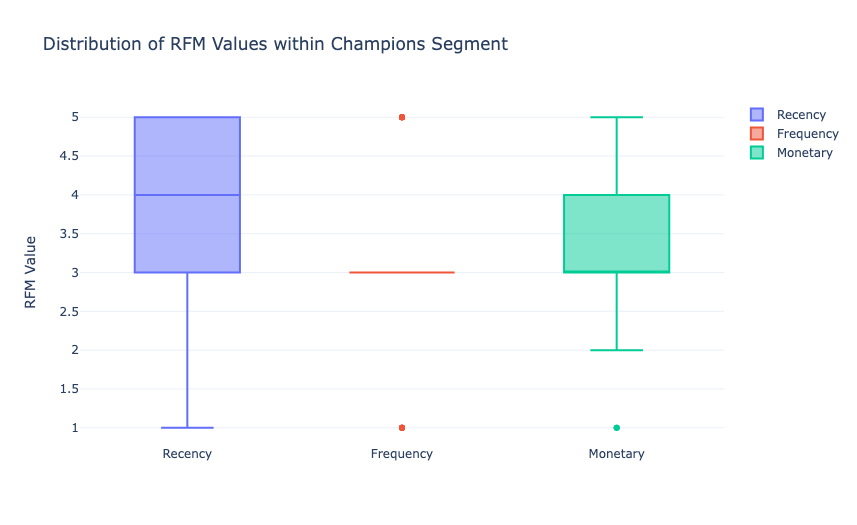

### Distribution of RFM Values within Champions Segment:
The boxplot for recency suggests that Champions are generally recent in their interactions, but with some variability.
Frequency and monetary values show greater spread, indicating differences in how often and how much they spend. There are outliers in both frequency and monetary values, which could indicate exceptionally loyal or high-spending customers within the Champions segment.

Now let’s analyze the correlation of the recency, frequency, and monetary scores within the champions segment:

In [ ]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

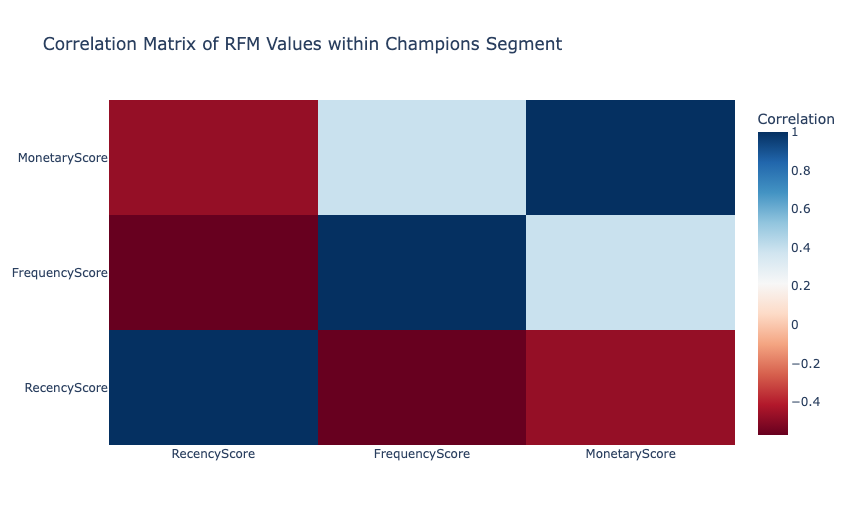

### Correlation Matrix of RFM Values within Champions:

The heatmap shows a strong positive correlation between frequency and monetary value, suggesting that the more frequently customers purchase, the more they tend to spend.
Recency has a weaker correlation with monetary value and frequency, which might indicate that the Champions segment, despite not being the most recent visitors, are still among the highest spenders.

let’s have a look at the number of customers in all the segments:

In [ ]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

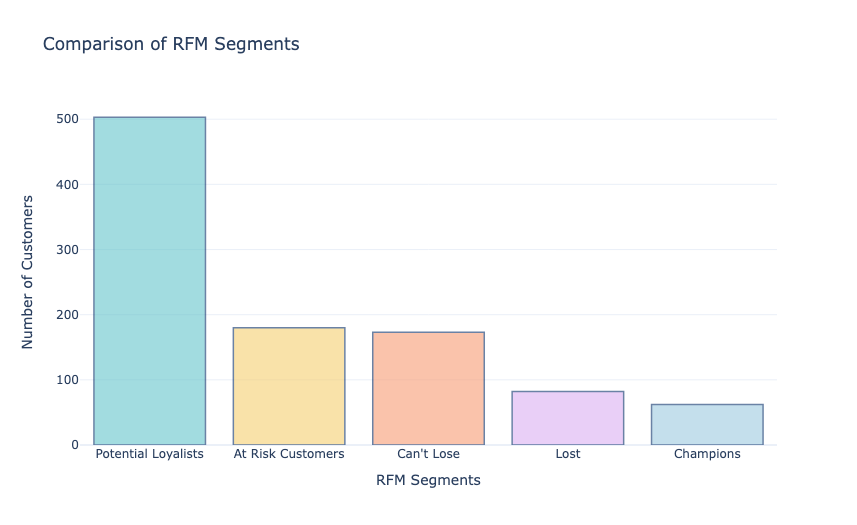

### Number of Customers in RFM Segments
- Potential Loyalists are the largest group, indicating many customers are on the path to loyalty but aren't quite there yet.
At Risk Customers and Can't Lose are significant segments, suggesting a considerable portion of the customer base may require attention to prevent churn.
- Lost and Champions segments are smaller, with Champions being the most desirable but least populated segment.

Now let’s have a look at the recency, frequency, and monetary scores of all the segments:



In [ ]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = data.groupby('RFM Customer Segments')['RecencyScore', 'FrequencyScore', 'MonetaryScore'].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

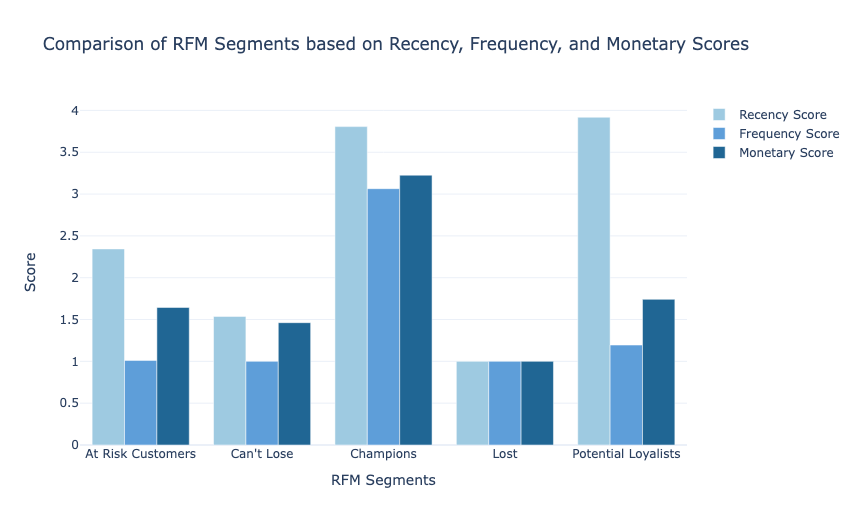

**- At Risk Customers:** They score moderately across all RFM metrics, indicating they have interacted with the business fairly recently, do so with moderate frequency, and spend an average amount of money.
**- Can't Lose:** This segment has a high frequency and monetary value but lower recency. They were once loyal and valuable but haven't shopped recently, signaling a risk of losing them.
**- Champions: **This group scores highly on all three metrics, indicating they are recent, frequent buyers with high spending—ideal customers.
**- Lost:** They have the lowest scores in all categories, suggesting these customers haven't made recent purchases, do so infrequently, and spend less when they do.
**- Potential Loyalists:** They show good frequency and spend amounts but have room for improvement in recency. These are customers with the potential to become more valuable if encouraged to engage more frequently.

# **Summary**


## General Recommendations:

1. For all segments, ensure that data is continuously collected and analyzed to refine customer understanding and adjust strategies as needed.
2. Invest in CRM (Customer Relationship Management) systems to automate personalized communication and track customer behavior trends over time.
3. Consider seasonality and life-cycle changes of customers to remain relevant and engaging in communications and offers.
4. Measure the success of implemented strategies through controlled tests and KPIs such as improved RFM scores, increased customer lifetime value, and higher retention rates.

in conclusion, RFM analysis is used to understand and segment customers based on their buying behaviour. RFM stands for recency, frequency, and monetary value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.